In [5]:
# imports

import io
import os
import sys
import csv
import math

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.font_manager as fm
import matplotlib.transforms as transforms

import pandas as pd
import numpy as np

In [6]:
#DATA PREPROCESSING

rows = []
with open("shuffled_6ary_data.csv", 'r') as csvfile:
    rows = csv.reader(csvfile, delimiter=',', quotechar='|')
    rows = list(rows)
numerical_rows = rows[1:len(rows)]
scores_array = np.array(numerical_rows)

# delete last column, it's empty
scores_array = np.delete(scores_array, 4, 1)
scores = pd.DataFrame(scores_array)
scores.columns = ['shuffle_ratio',
                  'Frequency drop score',
                  'Silhouette score',
                  'Naive tree distance score']

scores = scores.astype(float)

In [7]:
# TEMP TRANSFORM
scores.loc[:,'Silhouette score'] = (scores.loc[:,'Silhouette score'] + 1) / 2

print(scores)

    shuffle_ratio  Frequency drop score  Silhouette score  \
0             0.0                 1.000            1.0000   
1             0.1                 0.907            0.3855   
2             0.2                 0.792            0.2565   
3             0.3                 0.722            0.2755   
4             0.4                 0.593            0.2810   
5             0.5                 0.526            0.2935   
6             0.6                 0.451            0.3150   
7             0.7                 0.298            0.3515   
8             0.8                 0.225            0.3830   
9             0.9                 0.127            0.4065   
10            1.0                 0.106            0.4105   

    Naive tree distance score  
0                       1.000  
1                       0.839  
2                       0.670  
3                       0.574  
4                       0.426  
5                       0.365  
6                       0.302  
7          

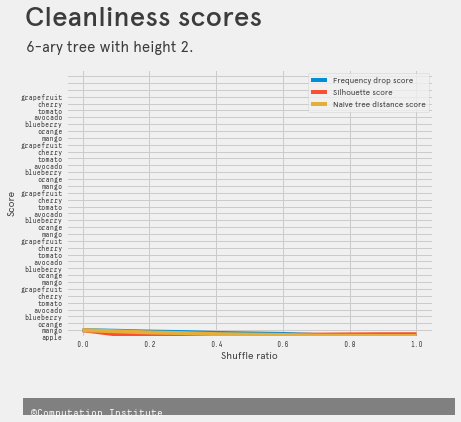

In [21]:
# PLOTTING

#================================================
# PARAMETERS
#================================================

# dataframe
df = scores

# x-axis
xaxis = 'shuffle_ratio'

# y-axis
yaxis = None

# text
title_text = "Cleanliness scores"
subtitle_text = "6-ary tree with height 2."
xlabel = "Shuffle ratio"
ylabel = "Score"
banner_text = "©Computation Institute"

# edges of plot in figure (padding)
top = 0.8
bottom = 0.18
left = 0.1
right = 0.95

# change title_pad to adjust xpos of title in pixels
# + is left, - is right
title_pad = 0 

# opacity
text_opacity = 0.75
xaxis_opacity = 0.7

# sizing
tick_label_size = 7
legend_size = 8
axis_label_size = 10
banner_text_size = 10

# import font
prop = fm.FontProperties(fname='DecimaMonoPro.ttf')
prop2 = fm.FontProperties(fname='apercu_medium_pro.otf')
prop3 = fm.FontProperties(fname='Apercu.ttf')
prop4 = fm.FontProperties(fname='Apercu.ttf', size=legend_size)

#================================================
# END OF PARAMETERS
#================================================

# figure initialization
fig, ax = plt.subplots(figsize=(6, 6))
plt.sca(ax)
style.use('fivethirtyeight')

#===PLOT===
graph = df.plot(x=xaxis, 
                y=yaxis,
                ax=ax, 
                use_index=True, 
                legend=True)

# add axis labels
plt.xlabel(xlabel, 
           fontproperties=prop3, 
           fontsize = axis_label_size, 
           alpha=text_opacity)
plt.ylabel(ylabel, 
           fontproperties=prop3, 
           fontsize = axis_label_size, 
           alpha=text_opacity)

# change font of legend
L = graph.legend(prop={'size': legend_size})
plt.setp(L.texts, fontproperties=prop4, alpha=text_opacity)

# set size of tick labels
graph.tick_params(axis = 'both', 
                  which = 'major', 
                  labelsize = tick_label_size)

# set fontname for tick labels
for tick in graph.get_xticklabels():
    tick.set_fontname("DecimaMonoPro")
for tick in graph.get_yticklabels():
    tick.set_fontname("DecimaMonoPro")
    
graph.set_yticklabels(["apple", "mango", "orange","blueberry","avocado","tomato","cherry","grapefruit", "mango", "orange","blueberry","avocado","tomato","cherry","grapefruit", "mango", "orange","blueberry","avocado","tomato","cherry","grapefruit", "mango", "orange","blueberry","avocado","tomato","cherry","grapefruit", "mango", "orange","blueberry","avocado","tomato","cherry","grapefruit"])
plt.yticks(np.arange(0, 40, 1.0))
    
# set color for tick labels
[t.set_color('#303030') for t in ax.xaxis.get_ticklabels()]
[t.set_color('#303030') for t in ax.yaxis.get_ticklabels()]

# create bolded x-axis
graph.axhline(y = 0, 
              color = 'black', 
              linewidth = 1.3, 
              alpha = xaxis_opacity)

# transforms the x axis to figure fractions, and leaves y axis in pixels
xfig_trans = transforms.blended_transform_factory(fig.transFigure, transforms.IdentityTransform())
yfig_trans = transforms.blended_transform_factory(transforms.IdentityTransform(), fig.transFigure)

# banner positioning
banner_y = math.ceil(banner_text_size * 0.6)

# banner text
banner = plt.annotate(banner_text, 
         xy=(0.02, banner_y), 
         xycoords=xfig_trans,
         fontsize = banner_text_size, 
         color = '#FFFFFF', 
         fontname='DecimaMonoPro')

# banner background height parameters
pad = 2 # points
bb= ax.get_window_extent()
h = bb.height/fig.dpi
height = ((banner.get_size()+2*pad)/72.)/h

# banner background
rect = plt.Rectangle((0,0), 
                     width=1, 
                     height=height,
                     transform=fig.transFigure, 
                     zorder=3,
                     fill=True, 
                     facecolor="grey", 
                     clip_on=False)
ax.add_patch(rect)

#transform coordinate of left
display_left_tuple = xfig_trans.transform((left,0))
display_left = display_left_tuple[0]

# shift title
title_shift = math.floor(tick_label_size * 2.6)
title_shift += title_pad

# title
graph.text(x = display_left - title_shift, y = 0.9, 
           transform = yfig_trans,
           s = title_text,
           fontproperties = prop2,
           weight = 'bold', 
           fontsize = 28,
           alpha = text_opacity)

# subtitle, +1 accounts for font size difference in title and subtitle
graph.text(x = display_left - title_shift + 1, y = 0.84, 
           transform = yfig_trans,
           s = subtitle_text,
           fontproperties=prop3,
           fontsize = 15, 
           alpha = text_opacity)

# adjust position of subplot in figure
plt.subplots_adjust(top=top)
plt.subplots_adjust(bottom=bottom)
plt.subplots_adjust(left=left)
plt.subplots_adjust(right=right)

# save to .svg
plt.savefig("test_chart.svg", dpi=300)